# Lorna No. 1-25
## Standard Petrophysics 
## (no curve normalization)


In [1]:
import lasio 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define functions for log analysis:

#### Shale Volume

In [2]:
def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min):
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min)
    return round(vshale, 4)

#### Density Porosity Function¶


In [3]:
def density_porosity(input_density, matrix_density, fluid_density):
    denpor = (matrix_density - input_density) / (matrix_density - fluid_density)
    return round(denpor, 4)

#### Water Saturation Functions

In [4]:
def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return sw

In [5]:
## Sw test
sw_archie(0.1, 10, 0.1, 1, 2, 2)

1.0

In [6]:
# equations from https://www.spec2000.net/01-quickmath.htm
def sw_simandoux(phie, rt, rw, archieA, archieM, archieN, vshale, rshale):
    A = (1 - vshale) * archieA * rw / (phie ** archieM)
    B = A * vshale / (2 * rshale)
    C = A / rt
    
    sw = ((B **2 + C)**0.5 - B) **(2 / archieN)
    return sw

In [7]:
## Sw Simandoux test
sw_simandoux(0.1, 10, 0.1, 1, 2, 2, 0.3, 2)

0.4627373132569206

### Load well data using Lasio

In [8]:
Lorna_las = lasio.read(r'C:\Users\14695\OneDrive\Geology Data\Kansas_Crawford\Shallow Aunt Em Project\las files\Bengalia_Lorna #1-25.las')

In [9]:
for item in Lorna_las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 545.0
STOP DEPTH (STOP): 2750.5
STEP (STEP): 0.5
NULL VALUE (NULL): -999.25
COMPANY (COMP): Bengalia Land and Cattle Company
WELL (WELL): Lorna No. 1-25
FIELD (FLD): Em Ext.
LOCATION (LOC): SW - NW--1980' FNL & 660' FWL
COUNTY (CNTY): Finney
LOG DATE (DATE): Thu Jul 17 04-13-18 2008
STATE (STAT): Kansas
SECTION (SECT): 25
TOWNSHIP (TOWN): 26S
RANGE (RANG): 31W
API # (API): API#15-055-21,996-00-00
PERMANENT DATUM (PDAT): Ground Level
LOG MEASURED FROM (LMF): Ground Level
DRILLING MEASURED FROM (DMF): Kelly Bushing
KB (EKB): 
DF (EDF): 
GL (EGL): 2815
DATE OF RECORD (DATE1): 07 / 17 / 2008
RECORDED BY (ENGI1): J. Loffredi
WITNESSED BY (WITN1): Randy Bacon
Depth Driller (DPDRL1): 2750
Depth Logger (DPLGR1): 2744


In [10]:
for curve in Lorna_las.curves:
    print(curve.mnemonic)

DEPT
CILD
CNDL
CNLS
CNPOR
CNSS
DCAL
DPOR
GR
LSPD
LTEN
RHOB
RHOC
RILD
RILM
RLL3
RXORT
SP
DT
ITT
SPOR


In [11]:
for count, curve in enumerate(Lorna_las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: FT, Description: Depth
Curve: CILD, Units: MMHO/M, Description: DIL Deep Conductivity
Curve: CNDL, Units: PU, Description: CN Dolomite Porosity
Curve: CNLS, Units: PU, Description: CN Limestone Porosity
Curve: CNPOR, Units: PU, Description: CN Selected Porosity
Curve: CNSS, Units: PU, Description: CN Sandstone Porosity
Curve: DCAL, Units: IN, Description: CDL Caliper
Curve: DPOR, Units: PU, Description: CDL Density Porosity
Curve: GR, Units: GAPI, Description: Gamma Ray
Curve: LSPD, Units: FT/MIN, Description: Line Speed
Curve: LTEN, Units: LB, Description: Surface Line Tension
Curve: RHOB, Units: G/CC, Description: CDL Bulk Density
Curve: RHOC, Units: G/CC, Description: CDL Density Correction
Curve: RILD, Units: OHM-M, Description: DIL Deep Resistivity
Curve: RILM, Units: OHM-M, Description: DIL Medium Resistivity
Curve: RLL3, Units: OHM-M, Description: DIL Shallow Resistivity
Curve: RXORT, Units: , Description: Rxo / Rt
Curve: SP, Units: MV, Description: DIL Spont

In [12]:
well = Lorna_las.df()

In [13]:
well.head()

,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,LSPD,LTEN,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,DT,ITT,SPOR
DEPT,,,,,,,,,,,,,,,,,,,,
545.0,3.0631,29.1841,35.7982,35.7982,38.1565,8.1473,49.1385,40.6875,-34.42,824.6293,1.8697,-0.5364,326.4709,NaN,0.5751,239.2935,NaN,68.4454,0.0,14.7422
545.5,3.4457,31.5578,37.4657,37.4657,39.3654,8.1473,48.8930,39.7008,-34.30,825.9196,1.8739,-0.5383,290.2173,NaN,0.5759,234.6554,NaN,68.6625,0.0,14.8957
546.0,4.0418,31.7230,37.6096,37.6096,39.4622,8.1476,47.9898,41.5679,-34.67,825.5007,1.8894,-0.5333,247.4161,NaN,0.5769,228.3764,NaN,68.7946,0.0,14.9891
546.5,4.6866,29.7709,36.1714,36.1714,38.4438,8.1478,46.7544,45.3986,-34.67,829.2025,1.9105,-0.5237,213.3745,NaN,0.5775,222.5507,NaN,68.7312,0.0,14.9443
547.0,4.9268,26.5170,33.6785,33.6785,36.2801,8.1479,45.9954,49.9460,-34.55,824.6132,1.9235,-0.5160,202.9725,NaN,0.5778,220.5648,-0.8697,68.2132,1.0,14.5780


In [14]:
well.describe()

,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,LSPD,LTEN,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,DT,ITT,SPOR
count,4412.000000,4358.000000,4393.000000,4358.000000,4358.000000,4408.000000,4412.000000,4385.000000,4411.000000,4412.000000,4412.000000,4412.000000,4109.000000,4259.000000,4383.000000,4411.000000,4408.000000,4394.000000,4394.000000,4394.000000
mean,327.784602,15.821817,22.883559,22.947755,25.945546,8.416467,23.840281,72.096392,-28.553226,1186.384344,2.302332,0.076517,34.683241,44.022165,73.266197,19.031233,-59.223161,92.028421,0.073964,31.420383
std,462.825670,9.754270,11.186458,11.234293,10.568300,0.967275,14.589442,28.567497,2.118746,220.802054,0.249480,0.117518,310.292364,1117.610127,201.732227,208.694506,40.629281,23.195517,0.285056,16.404184
min,0.000000,-31.985900,-50.000000,-50.000000,-47.199500,6.954700,-75.007200,0.000000,-35.530000,344.681200,0.000000,-2.665500,0.293300,0.420500,0.000000,-160.488300,-183.064700,-1.489600,0.000000,-34.716800
25%,43.345375,5.113975,12.253400,12.357850,16.346375,7.932000,15.720650,46.747600,-30.350000,968.956800,2.132275,0.058300,1.985800,2.026250,3.126200,-49.067200,-96.893675,70.950350,0.000000,16.513650
50%,147.150350,18.561300,27.427800,27.528850,30.123250,8.061950,22.478300,76.987900,-28.010000,1231.465900,2.325650,0.080050,5.998800,5.796900,13.404200,-33.789300,-47.076500,93.450550,0.000000,32.426150
75%,473.787250,23.077050,31.032200,31.064300,33.596400,8.435700,33.783925,94.091600,-26.650000,1375.570350,2.441150,0.116125,16.889500,14.011550,45.632700,-19.622250,-28.371075,106.373225,0.000000,41.565225
max,3409.591800,58.226500,55.534900,55.996400,53.242900,13.599400,158.479500,218.171600,0.240000,1683.811500,3.992600,0.298500,10634.382800,68201.406300,2120.471400,1003.046000,82.559400,162.317000,2.000000,81.129400


In [15]:
well_nan = well.notnull() * 1
well_nan.head()

,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,LSPD,LTEN,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,DT,ITT,SPOR
DEPT,,,,,,,,,,,,,,,,,,,,
545.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1
545.5,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1
546.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1
546.5,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1
547.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


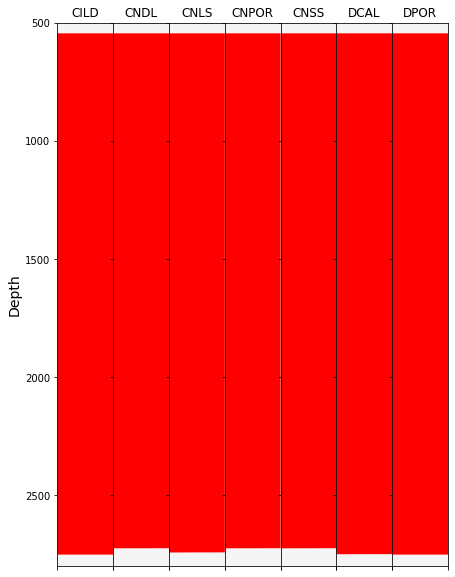

In [16]:
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(2800, 500)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

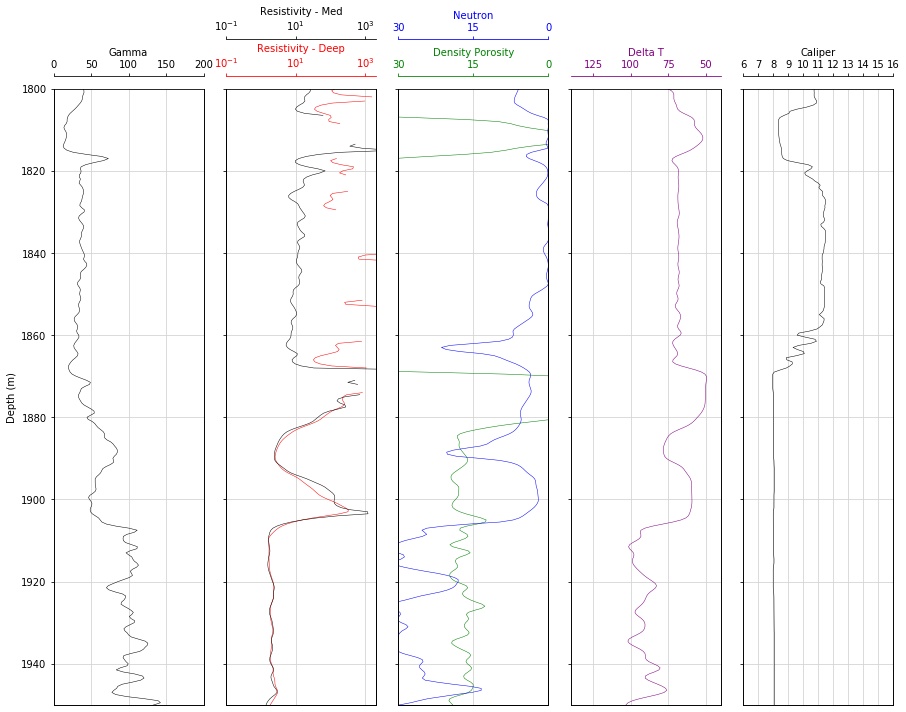

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(well["GR"], well.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot(well["RILD"], well.index, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot(well["DPOR"], well.index, color = "green", linewidth = 0.5)
ax3.set_xlabel("Density Porosity")
ax3.set_xlim(30,0)
ax3.xaxis.label.set_color("Green")
ax3.tick_params(axis='x', colors="Green")
ax3.spines["top"].set_edgecolor("Green")
ax3.set_xticks([30, 15, 0])

# Sonic track
ax4.plot(well["DT"], well.index, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Delta T")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot(well["CNPOR"], well.index, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(30, 0)
ax5.set_ylim(2800, 500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([30,  15, 0])

# Caliper track
ax6.plot(well["DCAL"], well.index, color = "black", linewidth = 0.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(6, 16)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
#ax6.fill_betweenx(well_nan.index, 8.5, well["DCAL"], facecolor='yellow')
ax6.set_xticks([6,7,8,9,10,11,12,13,14,15,16])

# Resistivity track - Curve 2
ax7.plot(well["RILM"], well.index, color = "black", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.2, 2000)
ax7.xaxis.label.set_color("Black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="Black")
ax7.spines["top"].set_edgecolor("Black")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()


# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.set_ylim(1800, 1950)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
for ax in [ax2, ax3, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
plt.gca().invert_yaxis()

In [26]:
#df2=well.groupby('Depth')['GR','CNPOR','RHOB']
df=well
df=df.rename(columns={'DEPT':'Depth', 'RILD':'DeepRes', 'CNPOR':'NPHI'})
df=df.rename_axis('Depth').reset_index()
df

,Depth,CILD,CNDL,CNLS,NPHI,CNSS,DCAL,DPOR,GR,LSPD,...,RHOB,RHOC,DeepRes,RILM,RLL3,RXORT,SP,DT,ITT,SPOR
0,545.0,3.0631,29.1841,35.7982,35.7982,38.1565,8.1473,49.1385,40.6875,-34.42,...,1.8697,-0.5364,326.4709,NaN,0.5751,239.2935,NaN,68.4454,0.0,14.7422
1,545.5,3.4457,31.5578,37.4657,37.4657,39.3654,8.1473,48.8930,39.7008,-34.30,...,1.8739,-0.5383,290.2173,NaN,0.5759,234.6554,NaN,68.6625,0.0,14.8957
2,546.0,4.0418,31.7230,37.6096,37.6096,39.4622,8.1476,47.9898,41.5679,-34.67,...,1.8894,-0.5333,247.4161,NaN,0.5769,228.3764,NaN,68.7946,0.0,14.9891
3,546.5,4.6866,29.7709,36.1714,36.1714,38.4438,8.1478,46.7544,45.3986,-34.67,...,1.9105,-0.5237,213.3745,NaN,0.5775,222.5507,NaN,68.7312,0.0,14.9443
4,547.0,4.9268,26.5170,33.6785,33.6785,36.2801,8.1479,45.9954,49.9460,-34.55,...,1.9235,-0.5160,202.9725,NaN,0.5778,220.5648,-0.8697,68.2132,1.0,14.5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,2748.5,0.0000,NaN,NaN,NaN,NaN,13.5994,-30.8649,NaN,-18.26,...,3.2378,-0.6568,NaN,136.7634,NaN,0.0000,-127.8855,NaN,NaN,NaN
4408,2749.0,0.0000,NaN,NaN,NaN,NaN,NaN,-43.8371,NaN,-10.74,...,3.4596,-1.1836,NaN,138.5491,NaN,0.0000,-118.3004,NaN,NaN,NaN
4409,2749.5,0.0000,NaN,NaN,NaN,NaN,NaN,-57.7321,NaN,-3.09,...,3.6972,-1.8540,NaN,149.1385,NaN,0.0000,-105.6581,NaN,NaN,NaN
4410,2750.0,0.0000,NaN,NaN,NaN,NaN,NaN,-75.0072,NaN,0.24,...,3.9926,-2.6655,NaN,192.1851,NaN,0.0000,-91.4261,NaN,NaN,NaN


In [27]:
df2=df[['Depth','GR','NPHI','RHOB','DPOR']]
df2=df2.loc[(df['Depth'] >= 1890) & (df['Depth'] <= 1905)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


(3, 1.9)

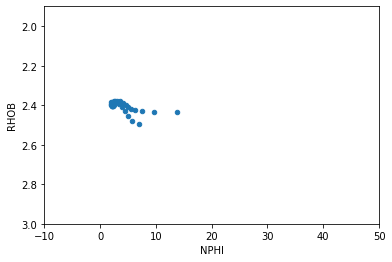

In [28]:
df2.plot(kind='scatter', x='NPHI', y='RHOB')
ax = plt.subplot(111)
ax.set_xlim(-10,50)
ax.set_ylim(3,1.9)


In [21]:
df2

,Depth,GR,NPHI,RHOB,DPOR
2690,1890.0,79.1107,13.7600,2.4326,16.2250
2691,1890.5,79.8837,9.7256,2.4339,16.1462
2692,1891.0,79.8876,7.5585,2.4315,16.2845
2693,1891.5,75.9144,6.2910,2.4254,16.6446
2694,1892.0,69.9483,5.5562,2.4168,17.1471
2695,1892.5,65.6859,5.0559,2.4071,17.7153
2696,1893.0,64.1614,4.6370,2.3968,18.3177
2697,1893.5,62.8362,4.1853,2.3868,18.8986
2698,1894.0,60.2106,3.6546,2.3796,19.3245
2699,1894.5,57.1406,3.1241,2.3767,19.4930


In [22]:
df2['DPOR'].max()

19.493

In [23]:
df2['NPHI'].min()

1.9844